# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Put the data in a form of Numpy array
sales=np.array([3205,2400,3027,2798,3700,3250,2689])
sales

array([3205, 2400, 3027, 2798, 3700, 3250, 2689])

In [0]:
# A function that calculates the mean
def f_mean(number_list):
  total=0
  for i in number_list:
    total+=i
    average=total/len(number_list)
  return average


In [4]:
# A simple array just for tests
a=np.array([1,2,3,4,5,6,7,8,9,10])
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [0]:
# A function that calculates the variance
def f_variance(number_list):
  total=0
  sum_squared=0
  for i in number_list:
    total+=i
    average=total/len(number_list)
  for i in number_list:
    sum_squared+=(i-average)**2
  variance=sum_squared/len(number_list)
  return variance


In [0]:
# A function that calculates the standard deviation
def f_std(number_list):
  total=0
  sum_squared=0
  for i in number_list:
    total+=i
    average=total/len(number_list)
  for i in number_list:
    sum_squared+=(i-average)**2
  variance=sum_squared/len(number_list)
  std_dev=(variance)**.5
  return std_dev

In [7]:
# Test the correctness
print('Test the correctness of the numbers calculated by my functions:')
print('Mean manually:',f_mean(sales))
print('Mean built-in:',np.mean(sales))
print('Variance manually:',f_variance(sales))
print('Variance built-in:',np.var(sales))
print('Standard deviation manually:',f_std(sales))
print('Standard deviation built-in:',sales.std(ddof=0))

Test the correctness of the numbers calculated by my functions:
Mean manually: 3009.8571428571427
Mean built-in: 3009.8571428571427
Variance manually: 156014.12244897962
Variance built-in: 156014.12244897962
Standard deviation manually: 394.98623070808384
Standard deviation built-in: 394.98623070808384


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [8]:
# Add the data about the number of customers
customers=np.array([127,80,105,92,120,115,93])
customers

array([127,  80, 105,  92, 120, 115,  93])

In [0]:
#s=[3205,2400,3027,2798,3700,3250,2689]
#c=[127,80,105,92,120,115,93]

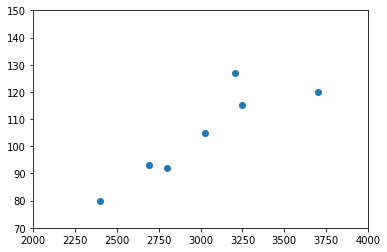

In [10]:
# Plot it on a graph
fake_data = {"s": sales, "c": customers}

df = pd.DataFrame(fake_data)

plt.scatter(df.s, df.c)
plt.xlim(2000,4000)
plt.ylim(70,150)
plt.show()

In [11]:
# Coviariance matrix
covariance=np.cov(sales,customers)
pd.DataFrame(covariance)

,0,1
0,182016.476190,6482.928571
1,6482.928571,290.952381


In [12]:
covariance=np.cov(sales,sales)
pd.DataFrame(covariance)

,0,1
0,182016.47619,182016.47619
1,182016.47619,182016.47619


In [13]:
sales =  [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93]

covariance=np.cov(sales,customers,bias=True)
print(pd.DataFrame(covariance))


sales_average=f_mean(sales)
customers_average=f_mean(customers)

print(sales)
print(customers)
sum_covar=0
print('sales_average:',sales_average)
print('customers_average:',customers_average)
sales_var=0
list(zip(sales,customers))

for (sale,customer) in zip(sales,customers):
  sum_covar+=(sales_average-sale)*(customers_average-customer)

covar_aver=sum_covar/(len(sales))
print('Covar aver:',covar_aver)
#  print((sales_average-sale)*(customers_average-customer))
#  print(sale,customer)
#    sales_var.append
#    sum_squared+=(i-average)**2
#  variance=sum_squared/len(number_list)


               0            1
0  183761.061224  6518.020408
1    6518.020408   249.387755
[3505, 2400, 3027, 2798, 3700, 3250, 2689]
[127, 80, 105, 92, 120, 115, 93]
sales_average: 3052.714285714286
customers_average: 104.57142857142857
Covar aver: 6518.020408163265


In [14]:
sales_average=f_mean(sales)
customers_average=f_mean(customers)
print(sales_average)
print(customers_average)
sales_variance=f_variance(sales)
customers_variance=f_variance(customers)
print(sales_variance)
print(customers_variance)
print('covar',customers_variance*sales_variance)

3052.714285714286
104.57142857142857
183761.06122448976
249.3877551020408
covar 45827758.53394418


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [15]:
# Use the previously written function to calculate
# Standard Deviation for customers
customers_std=f_std(customers)
sales_std=f_std(sales)
print('Standard Deviation (sales):',sales_std)
print('Standard Deviation (customers):',customers_std)

Standard Deviation (sales): 428.67360686714756
Standard Deviation (customers): 15.792015549069118


In [16]:
df = pd.DataFrame({'sales': sales, 'customers': customers})
df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [17]:
std_1 = np.std(df['sales'], ddof=1)
std_2 = np.std(df['customers'], ddof=1)
covar = df['sales'].cov(df['customers'])
print(f"Correlation coefficient: {covar / (std_1 * std_2):.2f}")

Correlation coefficient: 0.96


In [18]:
# Check
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [19]:
# Import the data
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
titanic_df=pd.read_csv(url)
print(titanic_df.shape)
titanic_df.sample(5)

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
115,116,1.0,0.0,"Fortune, Mr. Mark",male,64.0,1.0,4.0,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB",1
1259,1260,3.0,0.0,"Turcin, Mr. Stjepan",male,36.0,0.0,0.0,349247,7.8958,NaN,S,NaN,NaN,NaN,0
1300,1301,3.0,1.0,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1.0,0.0,2659,14.4542,NaN,C,NaN,NaN,NaN,0
501,502,2.0,1.0,"Mellinger, Miss. Madeleine Violet",female,13.0,0.0,1.0,250644,19.5000,NaN,S,14,NaN,"England / Bennington, VT",0
1061,1062,3.0,1.0,"Nilsson, Miss. Helmina Josefina",female,26.0,0.0,0.0,347470,7.8542,NaN,S,13,NaN,NaN,0


In [20]:
# Find mean of two variables
age_mean=titanic_df['age'].mean()
print("age_mean:",age_mean)
fare_mean=titanic_df['fare'].mean()
print("fare_mean:",fare_mean)

# Find the distance between each point and its corresponding mean
titanic_df['age_distance']=titanic_df.age-age_mean
titanic_df['fare_distance']=titanic_df.fare-fare_mean
titanic_df.head()

#titanic_new_data={'age':[titanic_df['age']],'fare':[titanic_df['fare']]}
#titanic_calc=pd.DataFrame(titanic_new_data)
#titanic_calc.head()

age_mean: 29.88113451242805
fare_mean: 33.29547928134572


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number,age_distance,fare_distance
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,-0.881135,178.042021
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,-28.964435,118.254521
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,-27.881135,118.254521
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,0.118865,118.254521
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,-4.881135,118.254521


In [21]:
# Now square the distances
titanic_df['age_squared_distance']=titanic_df.age_distance**2
titanic_df['fare_squared_distance']=titanic_df.fare_distance**2
titanic_df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number,age_distance,fare_distance,age_squared_distance,fare_squared_distance
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,-0.881135,178.042021,0.776398,31698.961142
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,-28.964435,118.254521,838.938467,13984.131670
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,-27.881135,118.254521,777.357662,13984.131670
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,0.118865,118.254521,0.014129,13984.131670
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,-4.881135,118.254521,23.825474,13984.131670


In [22]:
# Final formula (covariance)
observations=len(titanic_df)
print('Number of observations:', observations)

Variance_Age=titanic_df.age_squared_distance.sum()/observations
Variance_Fare=titanic_df.fare_squared_distance.sum()/observations

print("Age variance: ", Variance_Age)
print("Fair variance: ", Variance_Fare)

# Check the numbers by built-in command
print("Age variance (code):",titanic_df.age.var(ddof=0))
print("Fare variance (code):",titanic_df.fare.var(ddof=0))

Number of observations: 1310
Age variance:  165.72341787151458
Fair variance:  2672.824715592373
Age variance (code): 165.72341787151473
Fare variance (code): 2676.911603536706


In [23]:
# Actual variance covariance
titanic_df = titanic_df.drop(columns=['body'])
print("variance covariance\n", titanic_df.cov().to_string())
print()
print("correlation matrix\n", titanic_df.corr().to_string())

variance covariance
                          Unnamed: 0       pclass    survived           age       sibsp        parch           fare  has_cabin_number  age_distance  fare_distance  age_squared_distance  fare_squared_distance
Unnamed: 0             1.431175e+05   284.357034  -53.967125  -1442.939812   25.828746     1.172783   -9410.735123        -95.438885  -1442.939812   -9410.735123         -20218.992346          -1.091942e+06
pclass                 2.843570e+02     0.701969   -0.127248     -3.954605    0.053090     0.013287     -24.227788         -0.249992     -3.954605     -24.227788            -48.940566          -2.821305e+03
survived              -5.396713e+01    -0.127248    0.236250     -0.314343   -0.014088     0.034776       6.146023          0.061406     -0.314343       6.146023             10.786117           8.739201e+02
age                   -1.442940e+03    -3.954605   -0.314343    165.850021   -2.559806    -1.459378     114.416613          1.463138    165.850021     

In [24]:
print('Variance Covariance Matrix')
titanic_df.cov()

Variance Covariance Matrix


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number,age_distance,fare_distance,age_squared_distance,fare_squared_distance
Unnamed: 0,1.431175e+05,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,-95.438885,-1442.939812,-9410.735123,-20218.992346,-1.091942e+06
pclass,2.843570e+02,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-0.249992,-3.954605,-24.227788,-48.940566,-2.821305e+03
survived,-5.396713e+01,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.061406,-0.314343,6.146023,10.786117,8.739201e+02
age,-1.442940e+03,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,1.463138,165.850021,114.416613,972.667828,1.712652e+04
sibsp,2.582875e+01,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-0.003946,-2.559806,8.641768,42.557478,1.818657e+02
parch,1.172783e+00,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,0.013316,-1.459378,9.928031,45.453398,1.095787e+03
fare,-9.410735e+03,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961,114.416613,2678.959738,2088.529568,6.046978e+05
has_cabin_number,-9.543888e+01,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,0.174613,1.463138,10.976961,23.256227,1.334188e+03
age_distance,-1.442940e+03,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,1.463138,165.850021,114.416613,972.667828,1.712652e+04
fare_distance,-9.410735e+03,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961,114.416613,2678.959738,2088.529568,6.046978e+05


In [25]:
print('Correlation Matrix')
titanic_df.corr()

Correlation Matrix


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number,age_distance,fare_distance,age_squared_distance,fare_squared_distance
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,-0.603727,-0.296172,-0.481215,-0.188233,-0.200677
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.713857,-0.366370,-0.558629,-0.205676,-0.233799
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,0.302250,-0.050199,0.244265,0.078136,0.124831
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.271887,1.000000,0.171892,0.266005,0.092474
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.009064,-0.190747,0.160238,0.143855,0.012120
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.036806,-0.130872,0.221539,0.184902,0.087881
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253,0.171892,1.000000,0.142428,0.811250
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,1.000000,0.271887,0.507253,0.196012,0.221586
age_distance,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.271887,1.000000,0.171892,0.266005,0.092474
fare_distance,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253,0.171892,1.000000,0.142428,0.811250


<function matplotlib.pyplot.show>

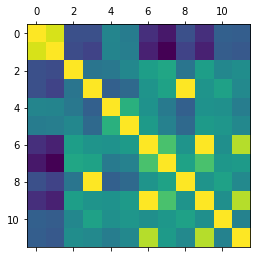

In [26]:
# We can visualize the correlation
import matplotlib.pyplot as plt
plt.matshow(titanic_df.corr())
plt.show

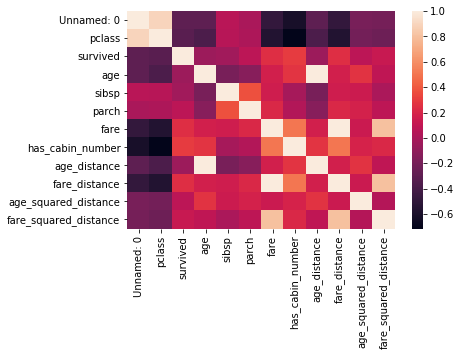

In [27]:
import seaborn as sns
sns.heatmap(titanic_df.corr());

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

[ 0.17047827  0.9007393  -0.25843646]
[0.44397703 0.03086426 0.40044308]
DOT-product: 6.938893903907228e-17


<function matplotlib.pyplot.show>

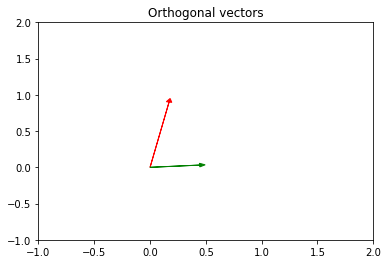

In [28]:
# Orthogonal means perpendicular

# Let's plot 2 orthogonal vectors
v_1=np.random.randn(3)
v_2=np.random.randn(3)
v_2-=v_2.dot(v_1)*v_1/np.linalg.norm(v_1)**2
print(v_1)
print(v_2)
print("DOT-product:", v_1.dot(v_2))

# Let's visualize them
plt.arrow(0,0,v_1[0],v_1[1],head_width=.05,head_length=.05,color="red")
plt.arrow(0,0,v_2[0],v_2[1],head_width=.05,head_length=.05,color="green")
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.title("Orthogonal vectors")
plt.show

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

[-5, 3, 7]
[6, -8, 2]
DOT-product: -40


<function matplotlib.pyplot.show>

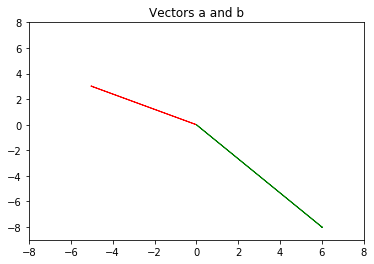

In [29]:
vector_a=[-5,3,7]
vector_b=[6,-8,2]
print(vector_a)
print(vector_b)
print("DOT-product:", np.dot(vector_a,vector_b))

# Let's visualize them
plt.arrow(0,0,vector_a[0],vector_a[1],head_width=.05,head_length=.05,color="red")
plt.arrow(0,0,vector_b[0],vector_b[1],head_width=.05,head_length=.05,color="green")
plt.xlim(-8,8)
plt.ylim(-9,8)
plt.title("Vectors a and b")
plt.show

They are not orthogonal since dot-product isn't zero

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [30]:
# Import the data
c=[2,-15,6,20]
print(c)
print('\n')
# ||𝑐||**2
norm_c = np.linalg.norm(c)
print('Norm of c:', norm_c)
norm_c_squared = norm_c**2
print('||𝑐||**2:', norm_c_squared)
print('\n')

# Dot-product 𝑐⋅𝑐
print('𝑐⋅𝑐:', np.dot(c,c))
print('\n')

# 𝑐𝑇𝑐
cT=[20,6,-15,2]
print('𝑐T:', cT)
print('\n')
print('𝑐Tc:', np.dot(cT,c))

[2, -15, 6, 20]


Norm of c: 25.787593916455254
||𝑐||**2: 665.0


𝑐⋅𝑐: 665


𝑐T: [20, 6, -15, 2]


𝑐Tc: -100


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [31]:
f=[4,12,11,9,2]
print('Vector f:',f)
print('\n')

norm_f = np.linalg.norm(f)
print('Norm of f:', norm_f)
print('\n')

unit_f=f/norm_f
unit_f
print(np.linalg.norm(unit_f))

Vector f: [4, 12, 11, 9, 2]


Norm of f: 19.131126469708992


0.9999999999999999


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

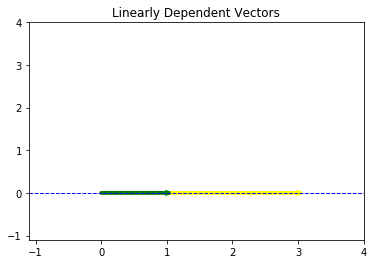

In [32]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,0] 

# Scaled Vectors
v2 = np.multiply(3, v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')

plt.title("Linearly Dependent Vectors")
plt.show()

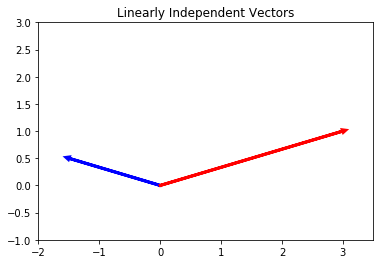

In [33]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [34]:
g=np.array([1,2])
h=np.array([4,8])
print(g)
print(h)

# These two vectors a collinear so they lay on one line

[1 2]
[4 8]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l=np.array([1,2,3])
m=np.array([-1,0,7])
n=np.array([4,8,2])

# a * [1 2 3] + b * [-1 0 7] ?= [4 8 2]
# a = 4, b = 0
# Therefore, vector n doesn't lie in the same plane with vectors l and m.
# Thus, span is invinite 3-dimensional space

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



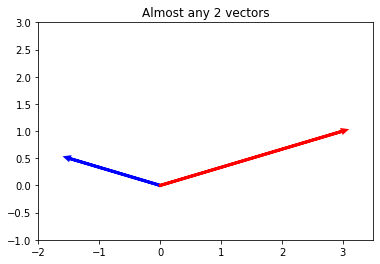

In [36]:
# Any 2 non-collinear vectors form basis for R^2

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Almost any 2 vectors")
plt.show()

## 6.2 What does it mean to form a basis?

It means to have some vectores that their span is the entire space. The amount of vectors equals the amount of dimensions

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [37]:
# Create matrix P
P=np.array([[1,2,3],
           [-1,0,7],
           [4,8,2]])
print("rank P =",np.linalg.matrix_rank(P)) # Calculate rank and print
pd.DataFrame(P)

rank P = 3


,0,1,2
0,1,2,3
1,-1,0,7
2,4,8,2


## 7.2 What does the rank of a matrix tell us?

It means that the 3 vectors form a 3-Dimensional span

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

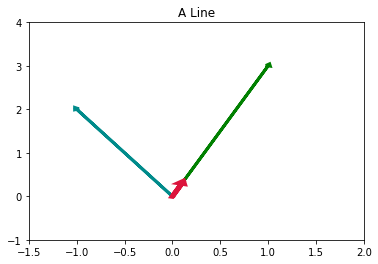

In [49]:
# State the vectors v and w
v=np.array([1,3])
w=np.array([-1,2])

# Get Vals for L
axes = plt.gca()
x_vals = 1 #np.array(axes.get_xlim())
y_vals = 3 #0*x_vals

# Plot a line
plt.xlim(-1.5,2)          
plt.ylim(-1,4)

w_proj=np.array([0.1, 0.3])

plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='darkcyan')
plt.arrow(0, 0, w_proj[0], w_proj[1], linewidth=5, head_width=.05, head_length=0.05, color ='crimson') # Projected
plt.title("A Line")
plt.show()



# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

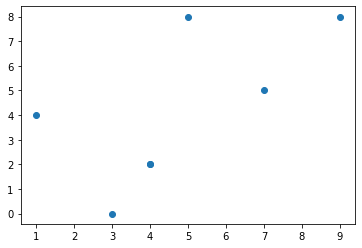

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()